In [26]:
from matplotlib.axes import Axes
from numpy import log
from pandas import read_csv, Series, factorize
import pandas as pd
import matplotlib as plt
from pandas import DataFrame
from pandas.plotting import register_matplotlib_converters
from matplotlib.pyplot import figure, savefig, show, subplots, hist, axis, axes, xticks, locator_params, title
from scipy.stats import norm, expon, lognorm
from seaborn import distplot, heatmap
from libs.ds_charts import bar_chart, get_variable_types, choose_grid, HEIGHT, multiple_bar_chart, multiple_line_chart

import re
from datetime import datetime

register_matplotlib_converters()

filename = 'dataset_1/NYC_collisions_tabular.csv'
data = read_csv(filename, na_values='na')

(169273, 32)


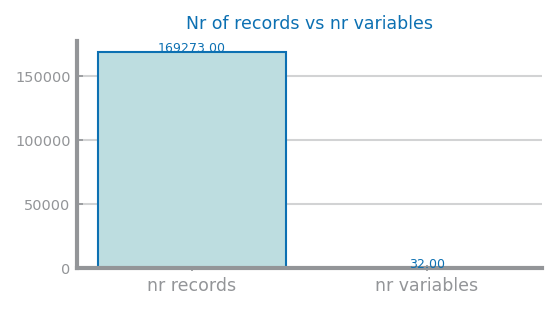

In [2]:
### DIMENSIONALITY
print(data.shape)
figure(figsize=(4,2))
values = {'nr records': data.shape[0], 'nr variables': data.shape[1]}
bar_chart(list(values.keys()), list(values.values()), title='Nr of records vs nr variables')
savefig('images/records_variables_dataset2.png')

         PERSON_AGE    VEHICLE_ID     UNIQUE_ID  COLLISION_ID
count  45248.000000  3.909800e+04  4.566900e+04  4.566900e+04
mean      37.487646  1.999663e+07  1.183588e+07  4.431737e+06
std       81.492032  7.940981e+04  1.375828e+05  2.753403e+04
min     -971.000000  1.982197e+07  1.153725e+07  4.380715e+06
25%       25.000000  1.996078e+07  1.177289e+07  4.408781e+06
50%       34.000000  2.000877e+07  1.185680e+07  4.432358e+06
75%       48.000000  2.005868e+07  1.194421e+07  4.455395e+06
max     9999.000000  2.010992e+07  1.203146e+07  4.478832e+06


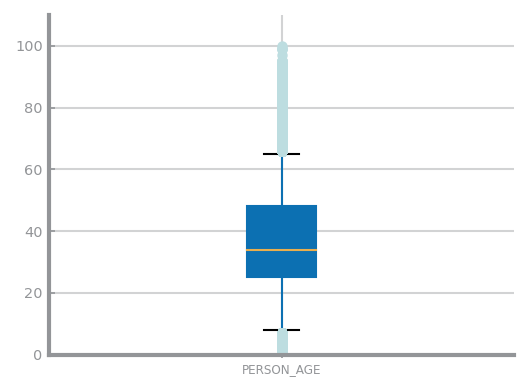

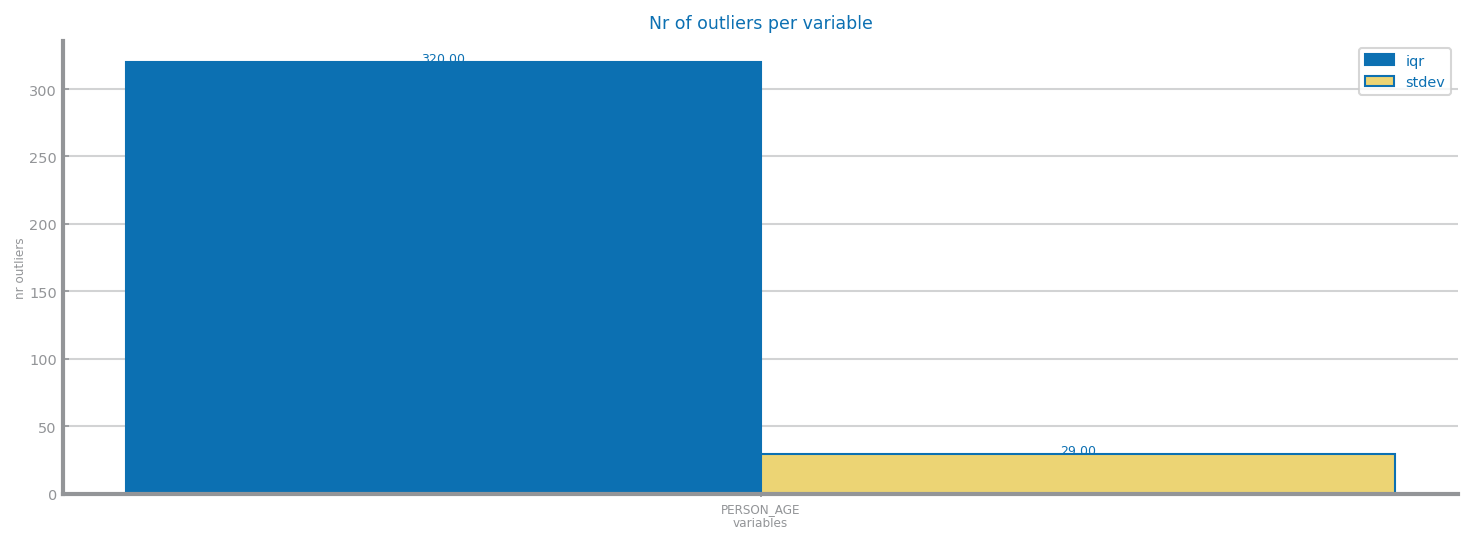

In [3]:
### DISTRIBUTION
# Fast description
summary5 = data.describe()
print(summary5)

#Individual boxplot for age
ax = data.boxplot(column=['PERSON_AGE'],return_type='axes')
ax.set_ylim(0, 110)
savefig('images/age_boxplot_dataset1.png')

#Number of outliers for age
NR_STDEV: int = 2
numeric_vars = ["PERSON_AGE"]
if [] == numeric_vars:
    raise ValueError('There are no numeric variables.')

outliers_iqr = []
outliers_stdev = []
summary5 = data.describe(include='number')

for var in numeric_vars:
    iqr = 1.5 * (summary5[var]['75%'] - summary5[var]['25%'])
    outliers_iqr += [
        data[data[var] > summary5[var]['75%']  + iqr].count()[var] +
        data[data[var] < summary5[var]['25%']  - iqr].count()[var]]
    std = NR_STDEV * summary5[var]['std']
    outliers_stdev += [
        data[data[var] > summary5[var]['mean'] + std].count()[var] +
        data[data[var] < summary5[var]['mean'] - std].count()[var]]

outliers = {'iqr': outliers_iqr, 'stdev': outliers_stdev}
figure(figsize=(12, HEIGHT))
multiple_bar_chart(numeric_vars, outliers, title='Nr of outliers per variable', xlabel='variables', ylabel='nr outliers', percentage=False)
savefig('images/outliers_dataset1.png')


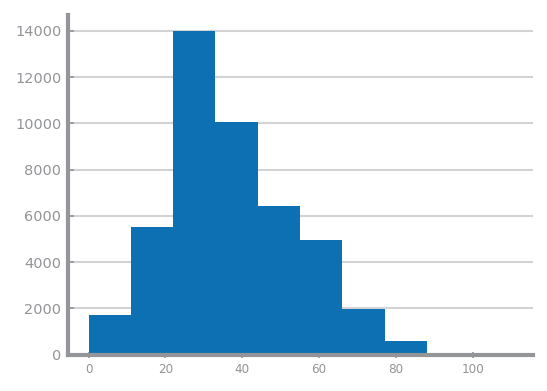

In [25]:
#Number of records per value
hist(data['PERSON_AGE'].dropna().values, range=(0,110))
savefig('images/single_histograms_numeric_dataset1.png')

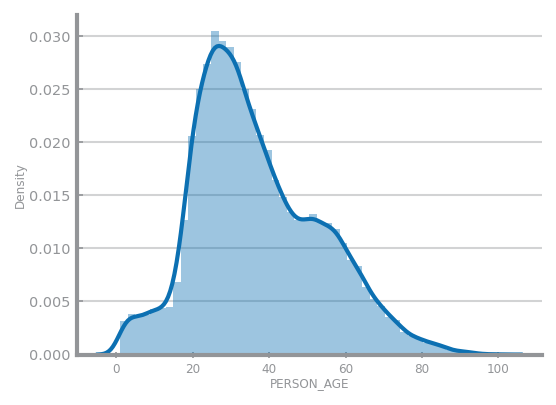

In [44]:
#Distribution of records per value
ages_list = data['PERSON_AGE'].dropna().values
ages_list_filter1 = ages_list[ages_list<110]
ages_list_filter2 = ages_list_filter1[ages_list_filter1>0]
distplot(ages_list_filter2, norm_hist=True, axlabel='PERSON_AGE')
savefig('images/histograms_trend_numeric_dataset1.png')
show()

Norm 36.91832656052228 16.43822949188755
Exp 2.0 34.91832656052228
LogNorm 4.1459362286389165 1.9999999444304475 1.6218125265115142


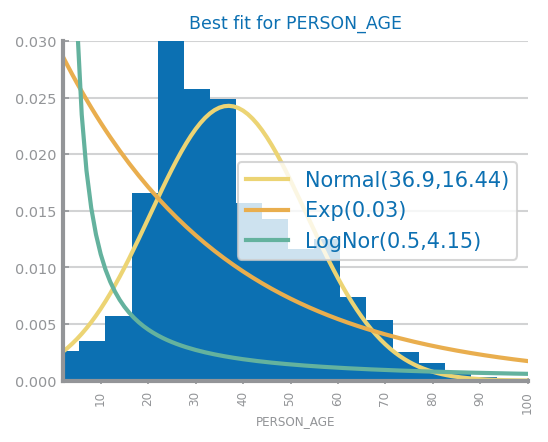

In [36]:
ax_dist = axes()
ax_dist.locator_params(nbins=10, axis='x')
ser = data['PERSON_AGE'].dropna()
ser = ser.where(ser>0).where(ser<110)

z=list(data['PERSON_AGE'])
#len(z)
sr=data['PERSON_AGE']
sr[(sr<100) | (sr >=1)]
Series(list(sr))

#Trying different distributions
def compute_known_distributions(x_values: list) -> dict:
    distributions = dict()
    # Gaussian
    mean, sigma = norm.fit(x_values)
    distributions['Normal(%.1f,%.2f)'%(mean,sigma)] = norm.pdf(x_values, mean, sigma)
    print( "Norm", mean, sigma)
    # Exponential
    loc, scale = expon.fit(x_values)
    print( "Exp", loc, scale)
    distributions['Exp(%.2f)'%(1/scale)] = expon.pdf(x_values, loc, scale)
    # LogNorm
    sigma, loc, scale = lognorm.fit(x_values)
    print( "LogNorm", sigma, loc, scale)
    distributions['LogNor(%.1f,%.2f)'%(log(scale),sigma)] = lognorm.pdf(x_values, sigma, loc, scale)
    return distributions

def histogram_with_distributions(ax: Axes, series: Series, var: str):
    values = series.sort_values().values
    ax.hist(values,20,density=True, range=(0,110))
    xticks(rotation=90)
    distributions = compute_known_distributions(values)
    ax.set_ylim(0,0.03)
    multiple_line_chart(values, distributions, ax=ax, title='Best fit for %s'%var, xlabel=var, ylabel='')
    
histogram_with_distributions(ax_dist,sr.where(sr>1).where(sr<110).dropna(), 'PERSON_AGE')
savefig('images/histogram_numeric_distribution.png')
show()

In [14]:
#max( data['PERSON_AGE']), min( data['PERSON_AGE'])
z=list(data['PERSON_AGE'])
#len(z)
sr=data['PERSON_AGE']
sr[(sr<100) | (sr >=1)]
Series(list(sr))

0        37.0
1        22.0
2        43.0
3        68.0
4        22.0
         ... 
45664    28.0
45665    25.0
45666    30.0
45667    62.0
45668    18.0
Length: 45669, dtype: float64

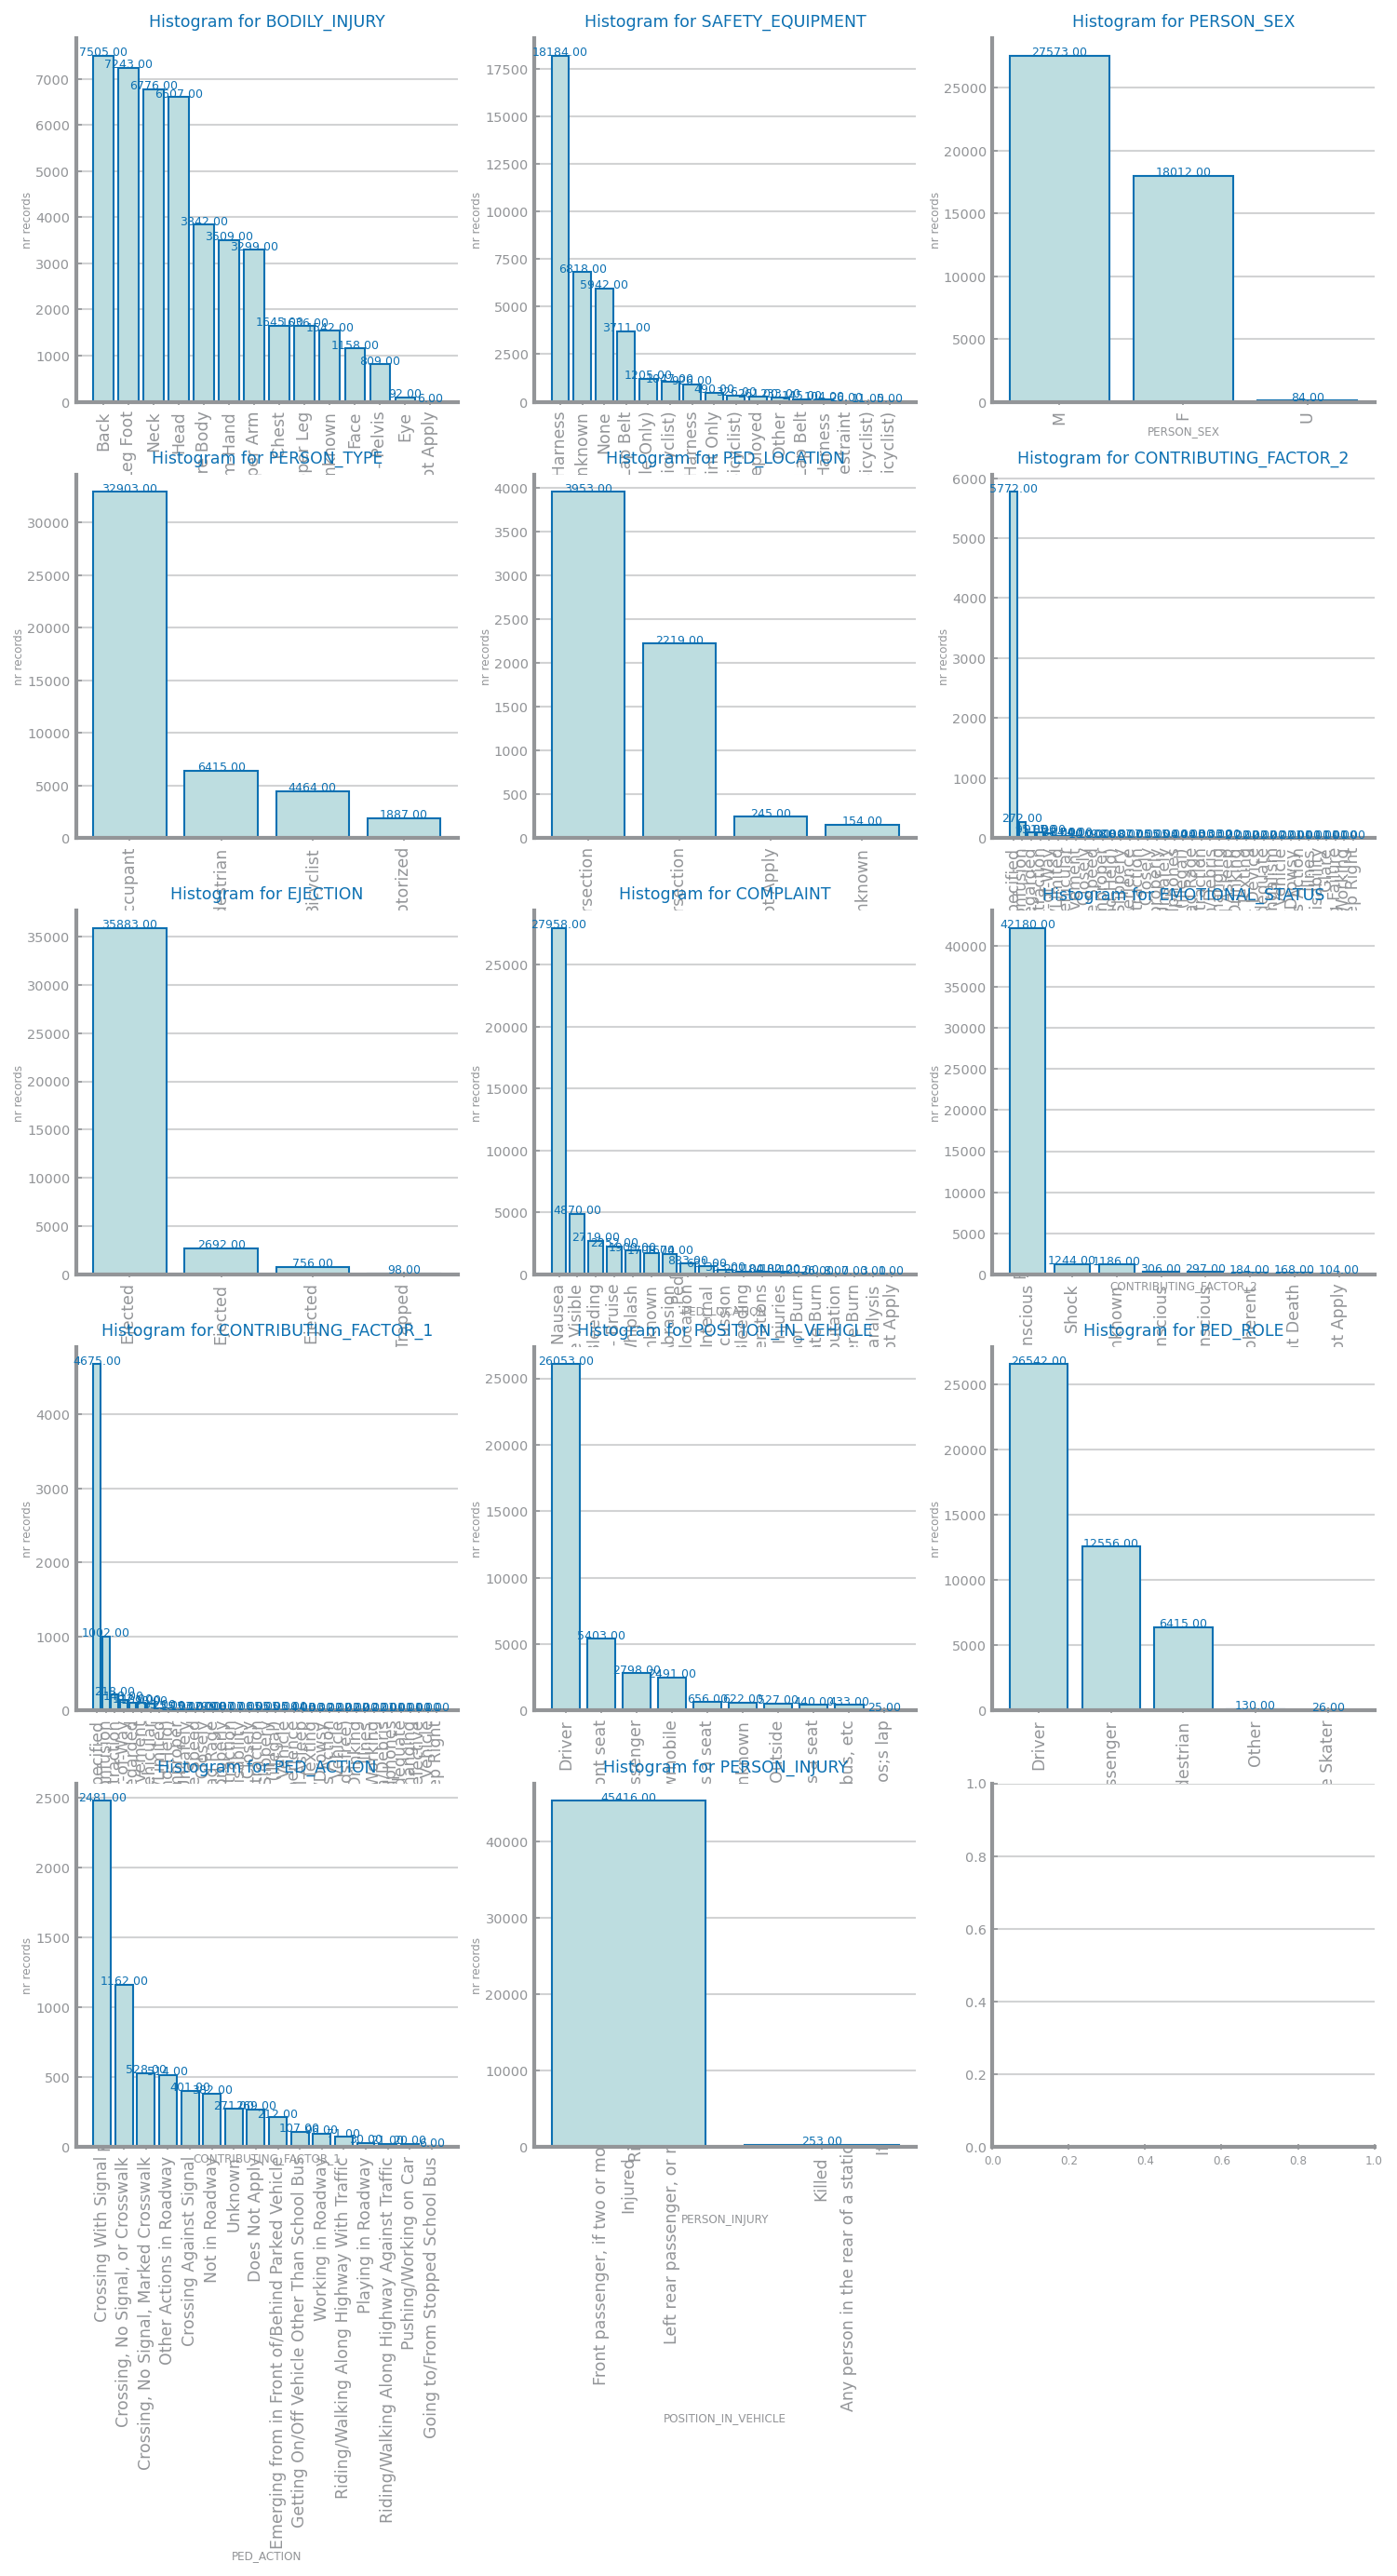

In [6]:
#Symbolic variables
symbolic_vars = ['BODILY_INJURY','SAFETY_EQUIPMENT','PERSON_SEX','PERSON_TYPE','PED_LOCATION','CONTRIBUTING_FACTOR_2','EJECTION','COMPLAINT','EMOTIONAL_STATUS','CONTRIBUTING_FACTOR_1','POSITION_IN_VEHICLE','PED_ROLE','PED_ACTION','PERSON_INJURY']
if [] == symbolic_vars:
    raise ValueError('There are no symbolic variables.')

rows, cols = choose_grid(len(symbolic_vars))
fig, axs = subplots(rows, cols, figsize=(cols*HEIGHT, rows*HEIGHT), squeeze=False)
i, j = 0, 0
for n in range(len(symbolic_vars)):
    counts = data[symbolic_vars[n]].value_counts()
    bar_chart(counts.index.to_list(), counts.values, ax=axs[i, j], title='Histogram for %s'%symbolic_vars[n], xlabel=symbolic_vars[n], ylabel='nr records', percentage=False, rotation=True)
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
savefig('images/histograms_symbolic.png')
show()



                       BODILY_INJURY  SAFETY_EQUIPMENT  PERSON_SEX  \
BODILY_INJURY               1.000000          0.034876    0.012431   
SAFETY_EQUIPMENT            0.034876          1.000000   -0.107308   
PERSON_SEX                  0.012431         -0.107308    1.000000   
PERSON_TYPE                -0.045187          0.198751   -0.159229   
PED_LOCATION               -0.017508         -0.341161    0.039330   
CONTRIBUTING_FACTOR_2      -0.009071         -0.175193    0.017713   
EJECTION                    0.003855          0.386079   -0.152075   
COMPLAINT                   0.096994          0.076650   -0.035942   
EMOTIONAL_STATUS            0.106042          0.035328   -0.005046   
CONTRIBUTING_FACTOR_1      -0.016385         -0.189645    0.024343   
POSITION_IN_VEHICLE         0.053320          0.218471    0.124593   
PED_ROLE                    0.045640         -0.099473    0.280739   
PED_ACTION                 -0.011954         -0.295333    0.015521   
PERSON_INJURY       

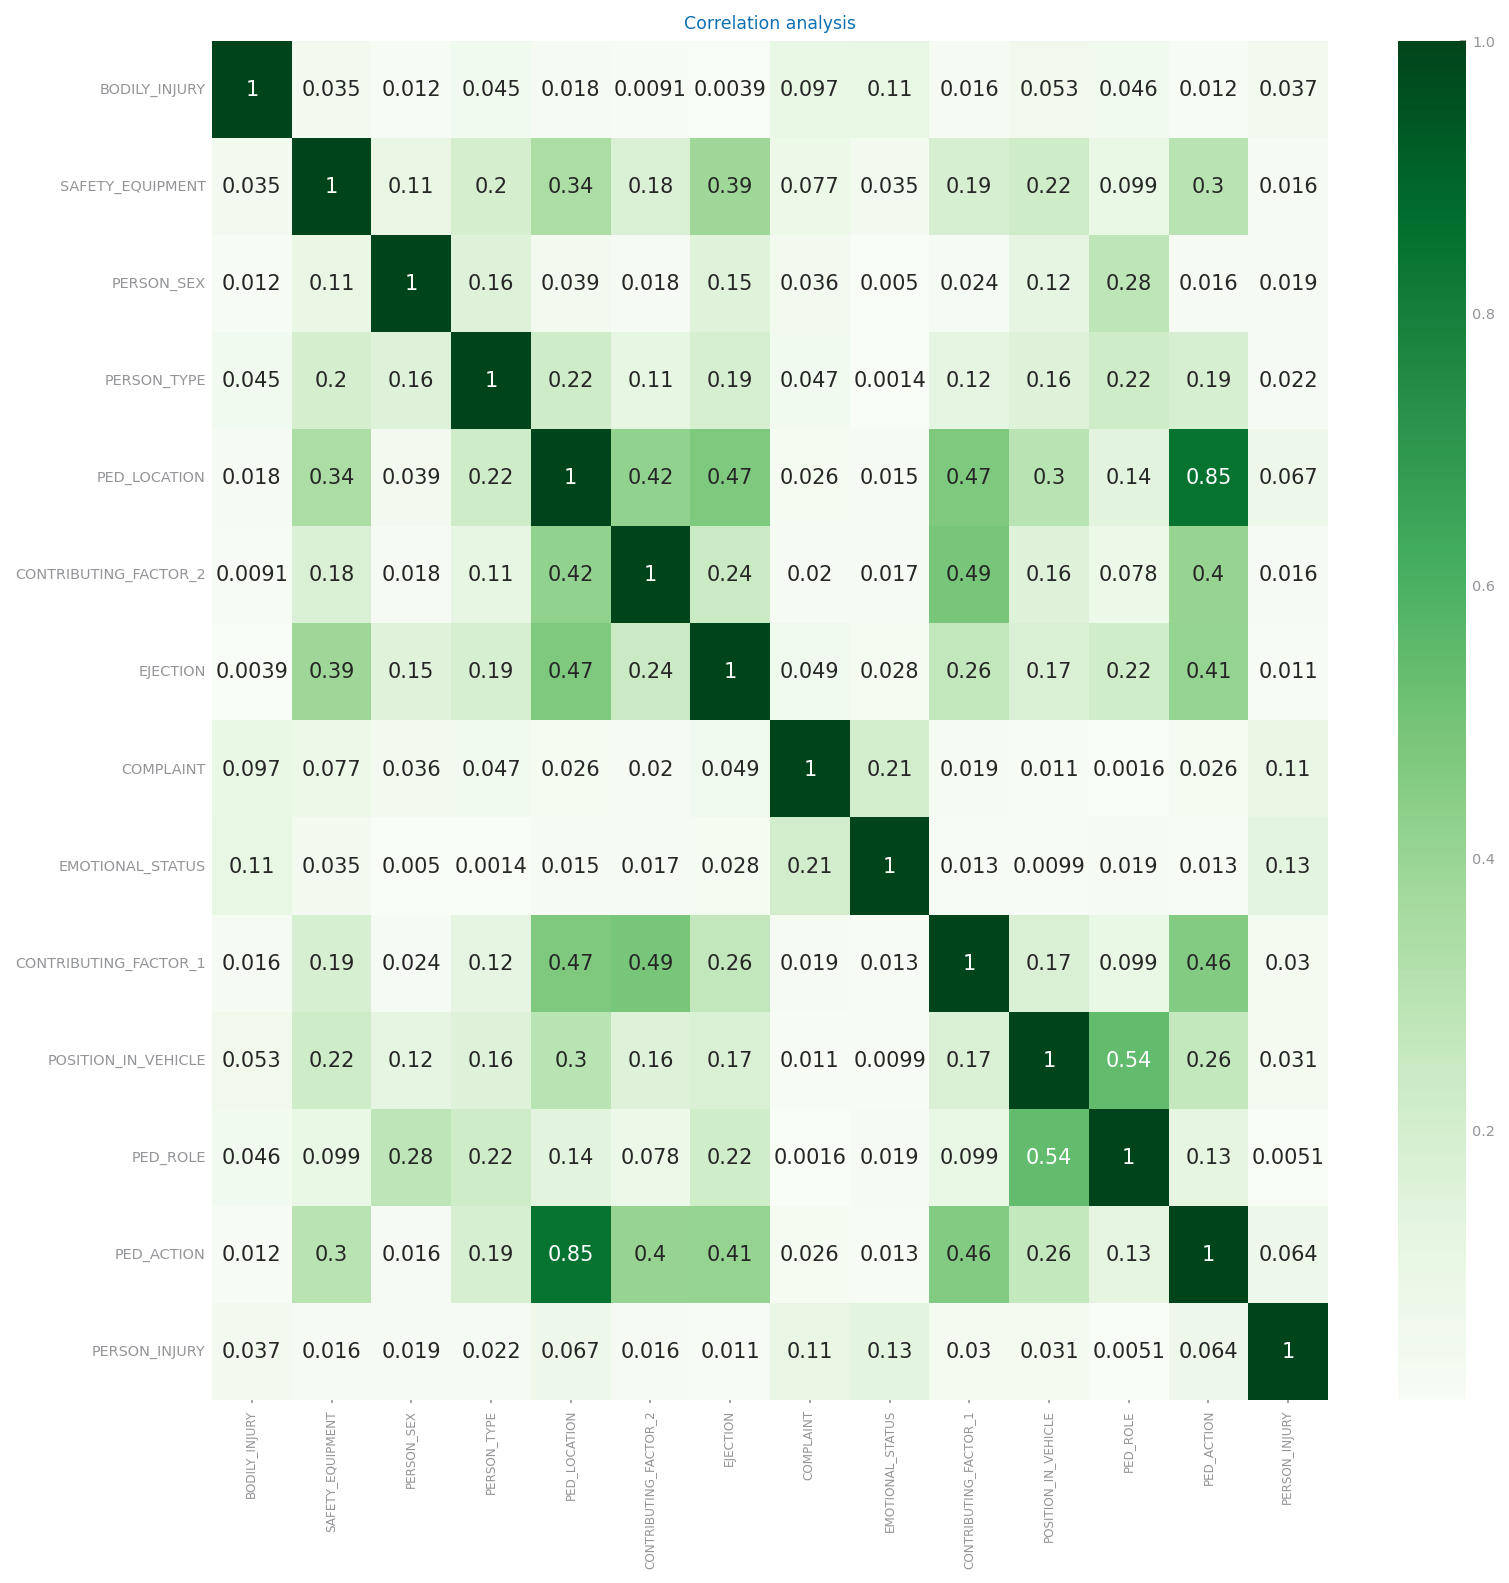

In [31]:
### DATA SPARSITY
#Correlation map
symbolic_vars = ['BODILY_INJURY','SAFETY_EQUIPMENT','PERSON_SEX','PERSON_TYPE','PED_LOCATION','CONTRIBUTING_FACTOR_2','EJECTION','COMPLAINT','EMOTIONAL_STATUS','CONTRIBUTING_FACTOR_1','POSITION_IN_VEHICLE','PED_ROLE','PED_ACTION','PERSON_INJURY']
just_symbolic = data[symbolic_vars].copy()
corr_mtx = just_symbolic.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
print(corr_mtx)
fig = figure(figsize=[12, 12])

heatmap(abs(corr_mtx), xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Greens')
title('Correlation analysis')
savefig(f'images/correlation_analysis.png')
show()

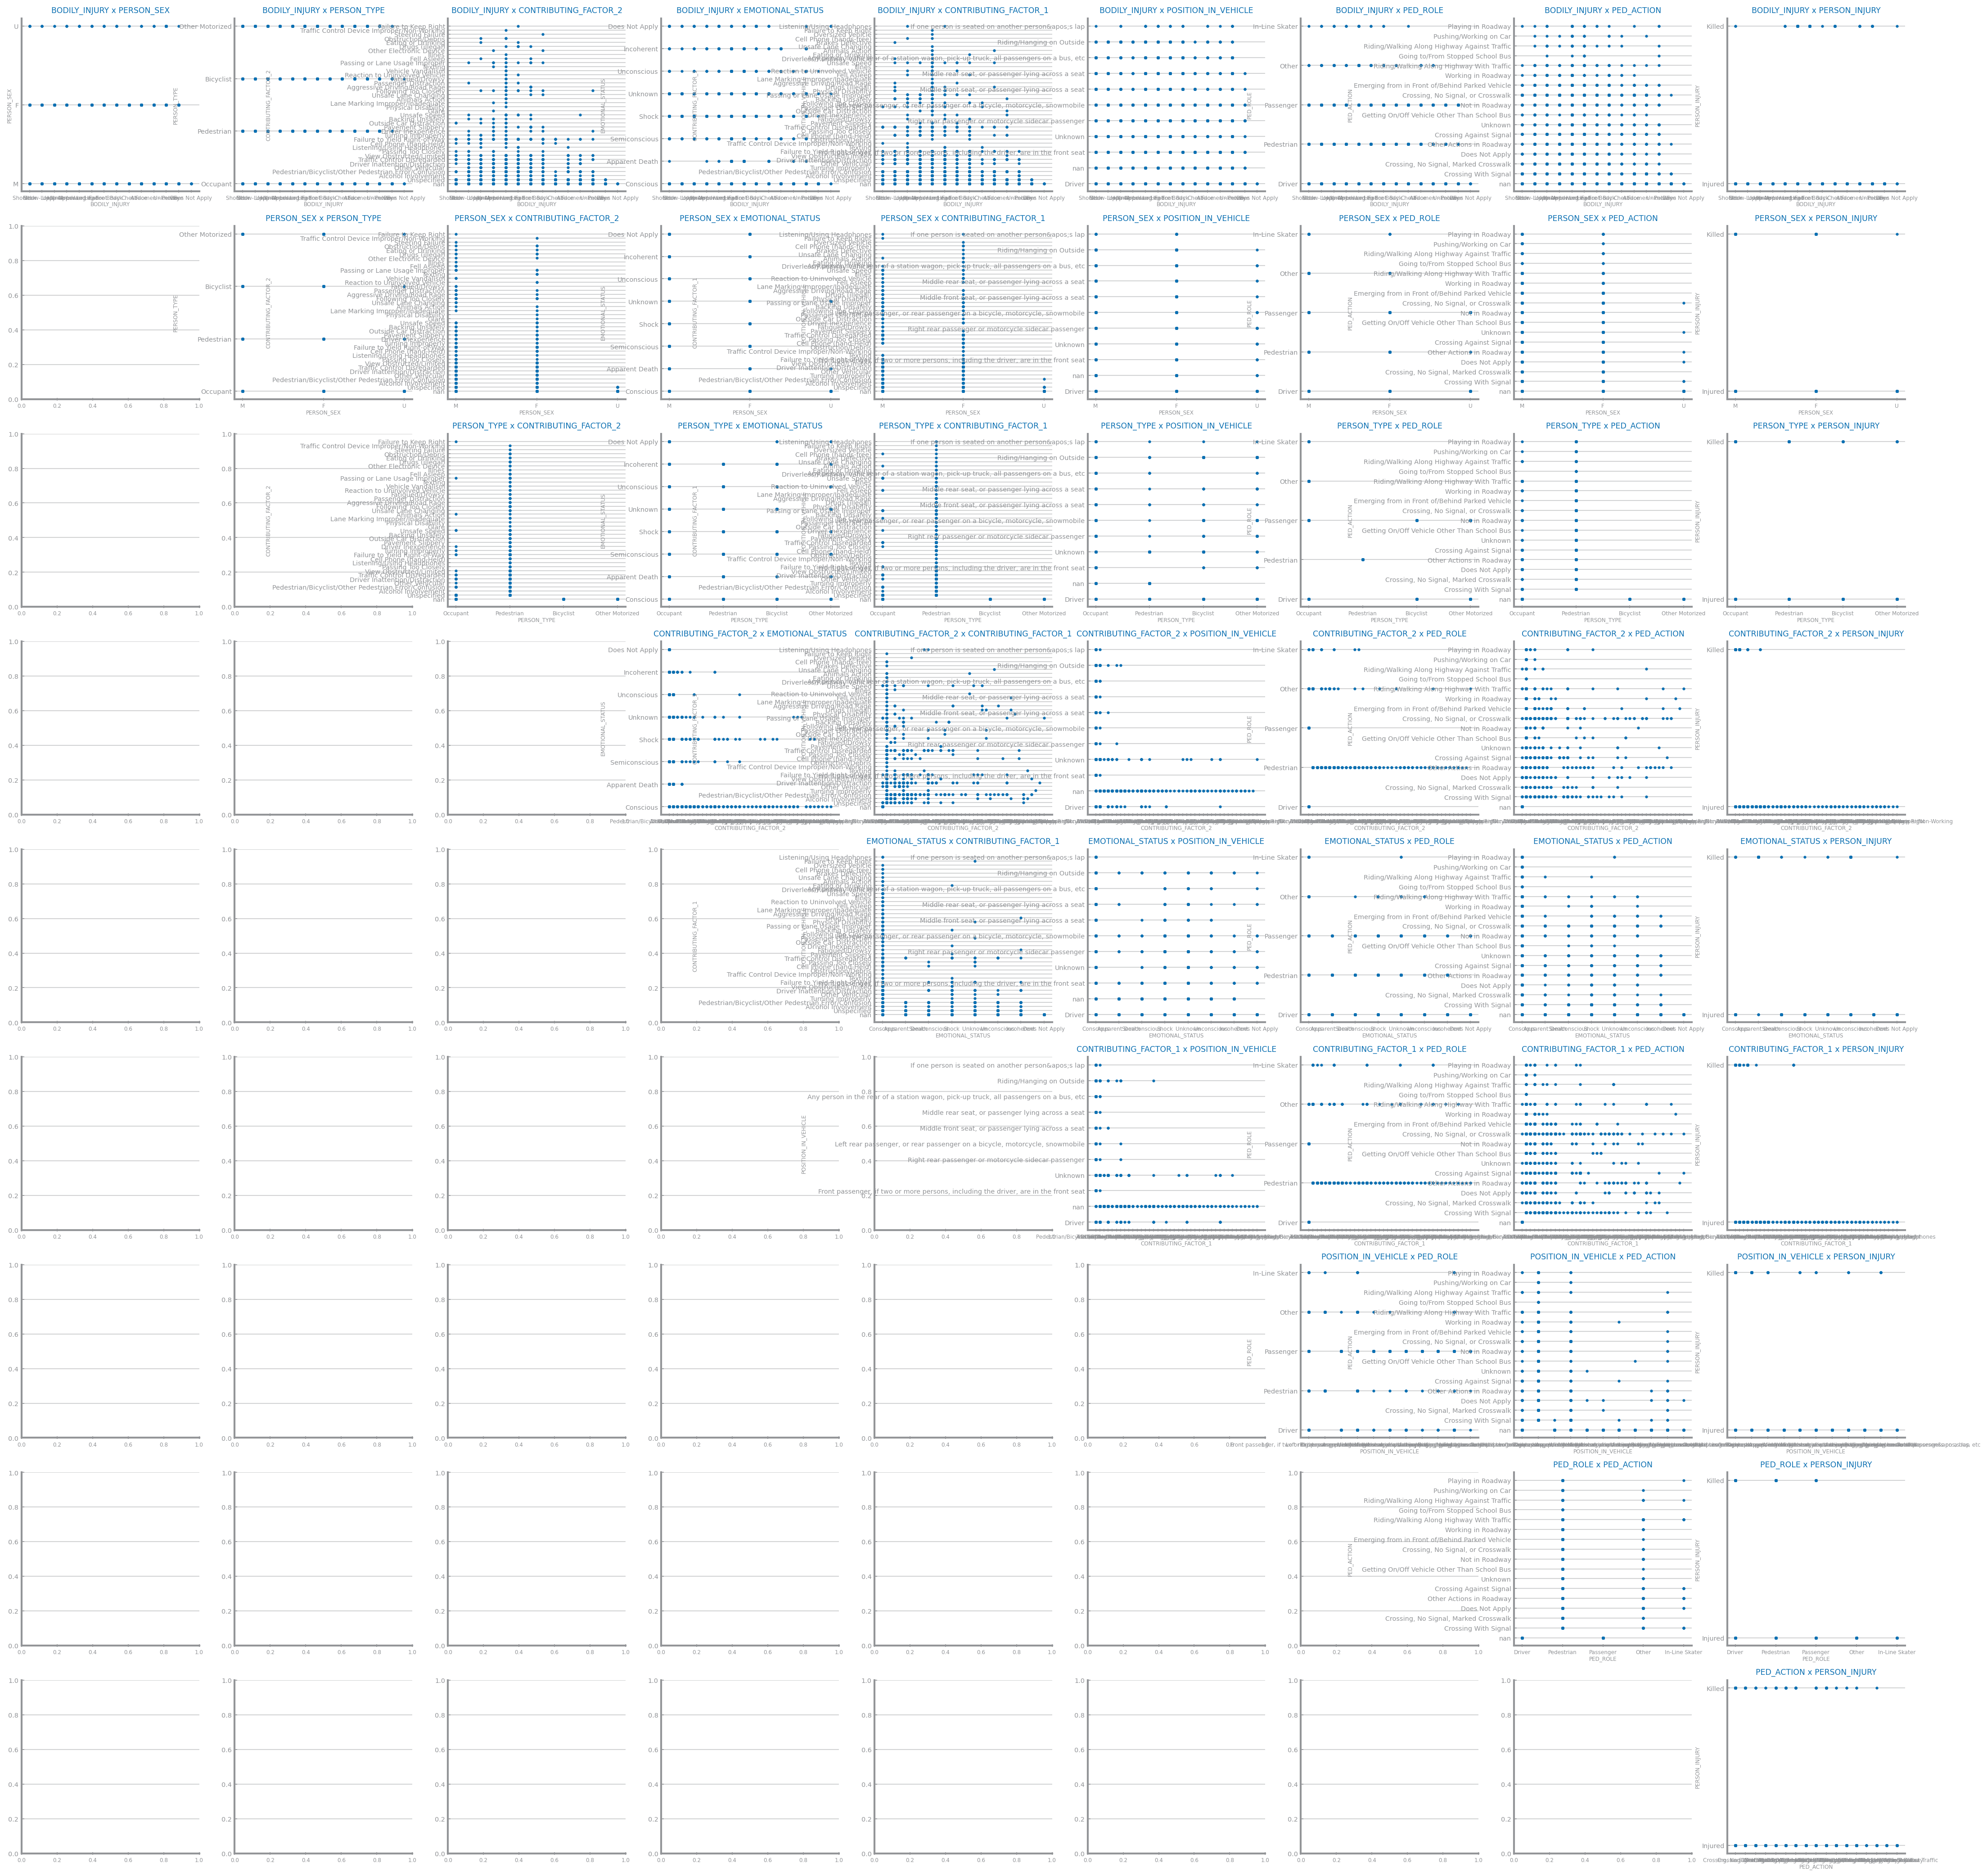

In [41]:
### DATA SPARSITY
# Correlation in pairs symbolic variables
symbolic_vars = ['BODILY_INJURY','PERSON_SEX','PERSON_TYPE','CONTRIBUTING_FACTOR_2','EMOTIONAL_STATUS','CONTRIBUTING_FACTOR_1','POSITION_IN_VEHICLE','PED_ROLE','PED_ACTION','PERSON_INJURY']
register_matplotlib_converters()
if [] == symbolic_vars:
    raise ValueError('There are no symbolic variables.')
rows, cols = len(symbolic_vars)-1, len(symbolic_vars)-1
fig, axs = subplots(rows, cols, figsize=(cols*HEIGHT, rows*HEIGHT), squeeze=False)
for i in range(len(symbolic_vars)):
    var1 = symbolic_vars[i]
    for j in range(i+1, len(symbolic_vars)):
        var2 = symbolic_vars[j]
        axs[i, j-1].set_title("%s x %s"%(var1,var2))
        axs[i, j-1].set_xlabel(var1)
        axs[i, j-1].set_ylabel(var2)
        axs[i, j-1].scatter(data[var1].apply(str), data[var2].apply(str))
savefig('images/sparsity_study_symbolic.png')
show()

In [42]:
corr_mtx = abs(data.corr())
print(corr_mtx)

              PERSON_AGE  VEHICLE_ID  UNIQUE_ID  COLLISION_ID
PERSON_AGE      1.000000    0.002057   0.000751      0.003721
VEHICLE_ID      0.002057    1.000000   0.999995      0.943931
UNIQUE_ID       0.000751    0.999995   1.000000      0.944774
COLLISION_ID    0.003721    0.943931   0.944774      1.000000


In [ ]:
"""
filename = 'dataset_2/air_quality_tabular.csv'
data = read_csv(filename, na_values='na')
# box plots for each numeric variable
summary5 = data.describe()
print(summary5)
columns_numeric=['CO_Mean','CO_Min','CO_Max','CO_Std','NO2_Mean', 'NO2_Min', 'NO2_Max','NO2_Std', 'O3_Mean','O3_Min'
                              ,'O3_Max', 'O3_Std', 'PM2.5_Mean', 'PM2.5_Min', 'PM2.5_Max', 'PM2.5_Std', 'PM10_Mean',
                              'PM10_Min', 'PM10_Max', 'PM10_Std', 'SO2_Mean', 'SO2_Min', 'SO2_Max', 'SO2_Std']
rows, cols = choose_grid(len(columns_numeric))
fig, axs = subplots(rows,cols, figsize=(cols*HEIGHT, rows*HEIGHT), squeeze=False)
i, j = 0, 0
for n in range(len(columns_numeric)):
    axs[i, j].set_title('Boxplot for %s'%columns_numeric[n])
    axs[i, j].boxplot(data[columns_numeric[n]].dropna().values)
    i, j = (i +1, 0) if (n+1) % cols == 0 else (i, j+1)
savefig('images/global_boxpot_dataset2.png')

# Outliers for each numeric variable
NR_STDEV: int = 2
outliers_iqr = []
outliers_stdev = []
summary5 = data.describe(include='number')

for var in columns_numeric:
    iqr = 1.5 * (summary5[var]['75%'] - summary5[var]['25%'])
    outliers_iqr += [
        data[data[var] > summary5[var]['75%']  + iqr].count()[var] +
        data[data[var] < summary5[var]['25%']  - iqr].count()[var]]
    std = NR_STDEV * summary5[var]['std']
    outliers_stdev += [
        data[data[var] > summary5[var]['mean'] + std].count()[var] +
        data[data[var] < summary5[var]['mean'] - std].count()[var]]

outliers = {'iqr': outliers_iqr, 'stdev': outliers_stdev}
figure(figsize=(12, HEIGHT))
multiple_bar_chart(columns_numeric, outliers, title='Nr of outliers per variable', xlabel='variables', ylabel='nr outliers', percentage=False)
savefig('images/outliers_per_numeric_variable_dataset2.png')
#show()

# Histogram for each numeric value
fig, axs =subplots(rows, cols, figsize=(cols*HEIGHT, rows*HEIGHT), squeeze = False)
i, j = 0, 0
for n in range(len(columns_numeric)):
    axs[i, j].set_title('Histogram for %s'%columns_numeric[n])
    axs[i, j].set_xlabel(columns_numeric[n])
    axs[i, j].set_ylabel('nr records')
    axs[i, j].hist(data[columns_numeric[n]].dropna().values, 'auto')
    i, j = ( i + 1, 0) if (n+1) % cols == 0 else (i, j+1)

savefig('images/single_histograms_numeric_dataset2.png')
#show()

# Display the best fit for each variable
fig, axs =subplots(rows, cols, figsize=(cols*HEIGHT, rows*HEIGHT), squeeze = False)
i, j = 0, 0
for n in range(len(columns_numeric)):
    axs[i, j].set_title('Histogram with trend for %s'%columns_numeric[n])
    distplot(data[columns_numeric[n]].dropna().values, norm_hist = True, ax=axs[i,j], axlabel= columns_numeric[n])
    i, j = (i +1, 0) if (n+1) %cols == 0 else (i, j+1)
savefig('images/histograms_trend_numeric_dataset2.png')
#show()

# Now compute distribuitions (norm, expon, skewnorm, etc)
def compute_known_distributions(x_values: list) -> dict:
    distributions = dict()
    # Gaussian
    mean, sigma = norm.fit(x_values)
    distributions['Normal(%.1f,%.2f)'%(mean,sigma)] = norm.pdf(x_values, mean, sigma)
    # Exponential
    loc, scale = expon.fit(x_values)
    distributions['Exp(%.2f)'%(1/scale)] = expon.pdf(x_values, loc, scale)
    # LogNorm
    #
    sigma, loc, scale = lognorm.fit(x_values)
    distributions['LogNor(%.1f,%.2f)'%(log(scale),sigma)] = lognorm.pdf(x_values, sigma, loc, scale)
    return distributions

def histogram_with_distributions(ax: Axes, series: Series, var: str):
    values = series.sort_values().values
    ax.hist(values, 20, density=True)
    distributions = compute_known_distributions(values)
    multiple_line_chart(values, distributions, ax=ax, title='Best fit for %s'%var, xlabel=var, ylabel='')

fig, axs = subplots(rows, cols, figsize=(cols*HEIGHT, rows*HEIGHT), squeeze=False)
i, j = 0, 0
for n in range(len(columns_numeric)):
    histogram_with_distributions(axs[i, j], data[columns_numeric[n]].dropna(), columns_numeric[n])
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
savefig('images/histogram_numeric_distribution_dataset2.png')
#show()

'''
Histogram for Symbolic variables
'Symbolic': ['date', 'City_EN', 'Prov_EN', 'GbCity']}
'''
symbolic_vars = ['City_EN', 'Prov_EN'] # GB City numeric!(id); date?


for n in range(len(symbolic_vars)):
    rows, cols = choose_grid(1)
    fig, axs = subplots(rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False)
    i, j = 0, 0
    counts = data[symbolic_vars[n]].value_counts()
    bar_chart(counts.index.to_list(), counts.values, ax=axs[i, j], title='Histogram for %s'%symbolic_vars[n], xlabel=symbolic_vars[n], ylabel='nr records', percentage=False,
              rotation = True)
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
    string = 'images/histograms_symbolic_dataset2' + str(n) + '.png'
    savefig(string)
#show()
"""
